<Figure size 1500x1000 with 0 Axes>

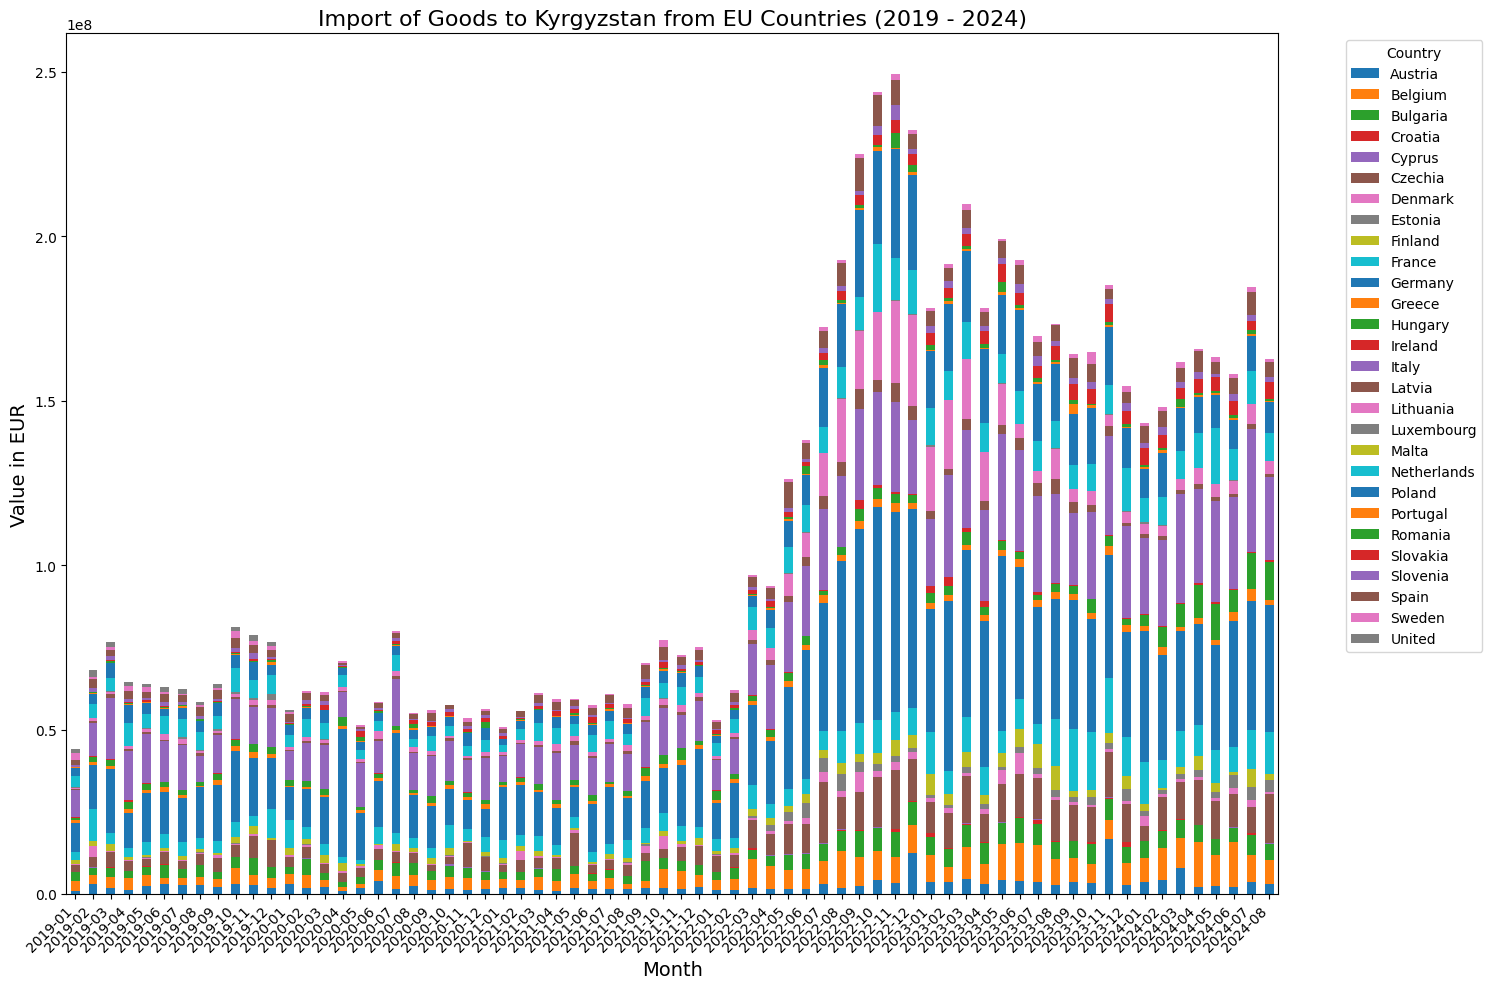

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define the folder path where the CSV files are stored
folder_path = 'data/armenia_export_eurostat'

# Create an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Loop through all CSV files in the folder and append them to the combined DataFrame
for file in glob.glob(os.path.join(folder_path, '*.csv')):
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_IN_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year and month
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y-%m')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Pivot the data to get 'PERIOD' as index and each 'REPORTER' as a separate column with 'VALUE_IN_EUR' as values
df_pivot = combined_df_filtered.pivot_table(index='PERIOD', columns='REPORTER', values='VALUE_IN_EUR', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart to visualize import data by month
plt.figure(figsize=(15, 10))

# Plotting the data as a stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 10))

# Setting title and labels
plt.title('Import of Goods to Kyrgyzstan from EU Countries (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


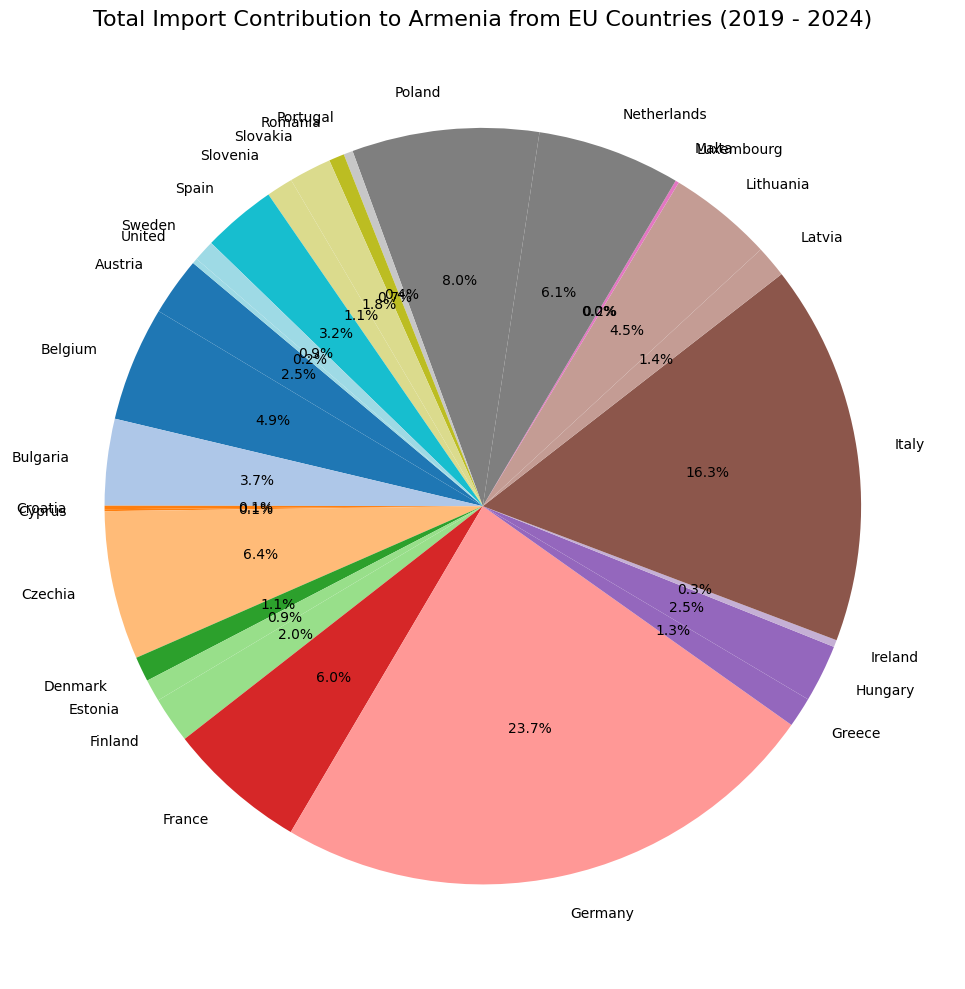

In [2]:
import seaborn as sns

# Aggregate the data by 'REPORTER' to calculate total imports from each country
total_imports_by_country = combined_df_filtered.groupby('REPORTER')['VALUE_IN_EUR'].sum()

# Plotting the pie chart to visualize total import contribution by each country
plt.figure(figsize=(10, 10))

# Plotting the pie chart
total_imports_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')

# Setting title
plt.title('Total Import Contribution to Armenia from EU Countries (2019 - 2024)', fontsize=16)
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

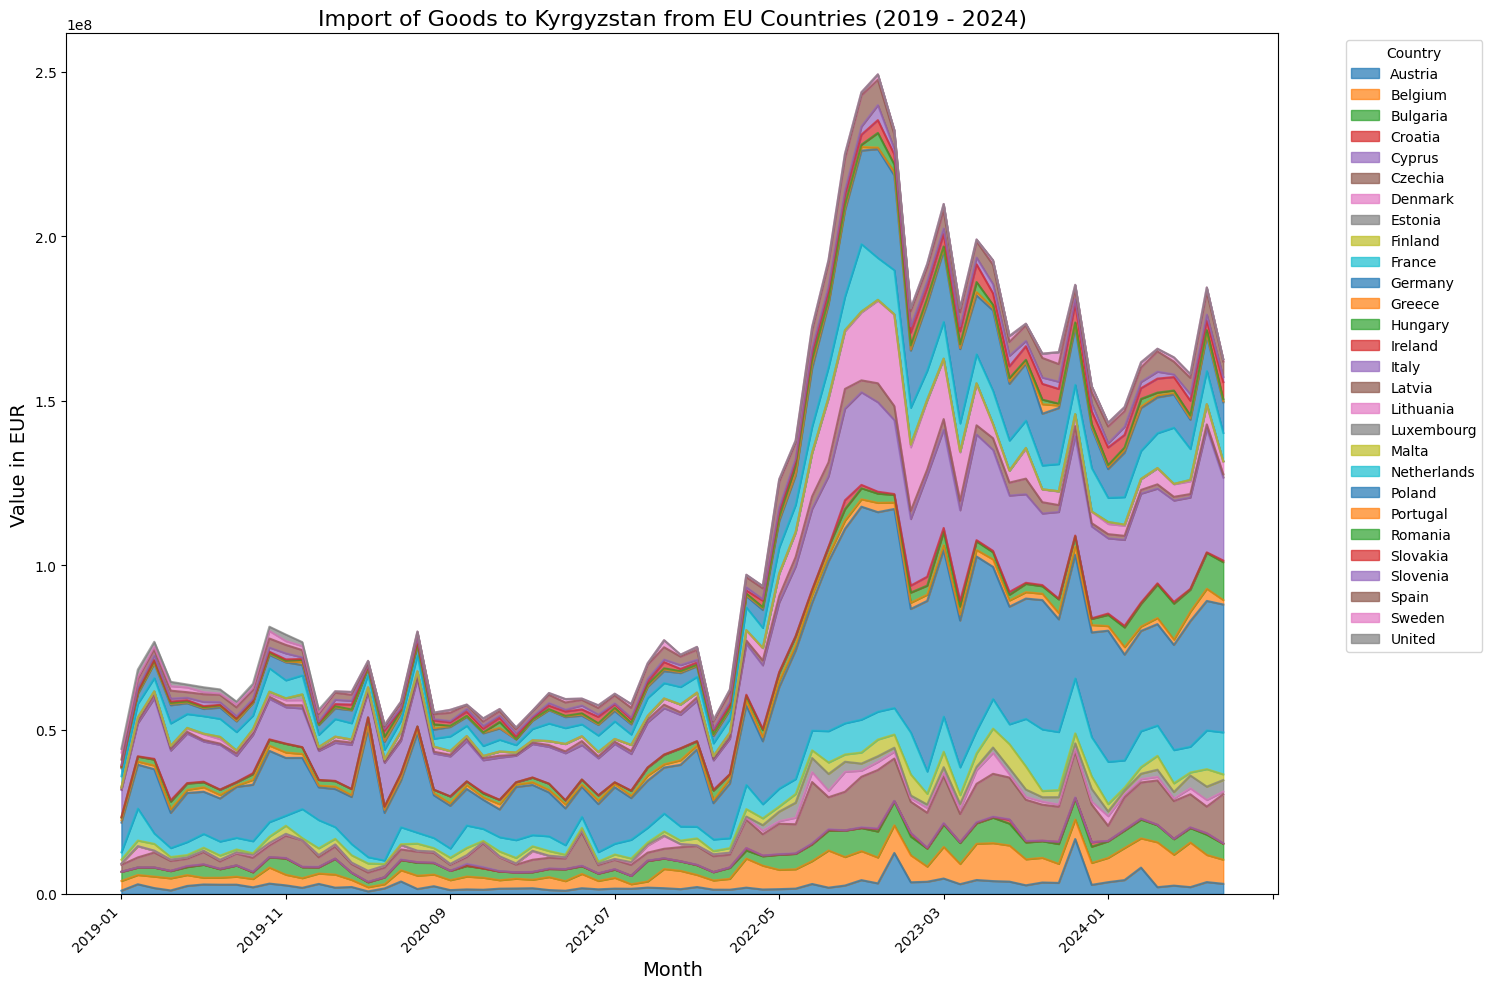

In [3]:

# Pivot the data to get 'PERIOD' as index and each 'REPORTER' as a separate column with 'VALUE_IN_EUR' as values
df_pivot = combined_df_filtered.pivot_table(index='PERIOD', columns='REPORTER', values='VALUE_IN_EUR', aggfunc='sum', fill_value=0)

# Plotting the area chart to visualize import data by month
plt.figure(figsize=(15, 10))

# Plotting the data as an area chart
df_pivot.plot(kind='area', stacked=True, figsize=(15, 10), alpha=0.7)

# Setting title and labels
plt.title('Import of Goods to Kyrgyzstan from EU Countries (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

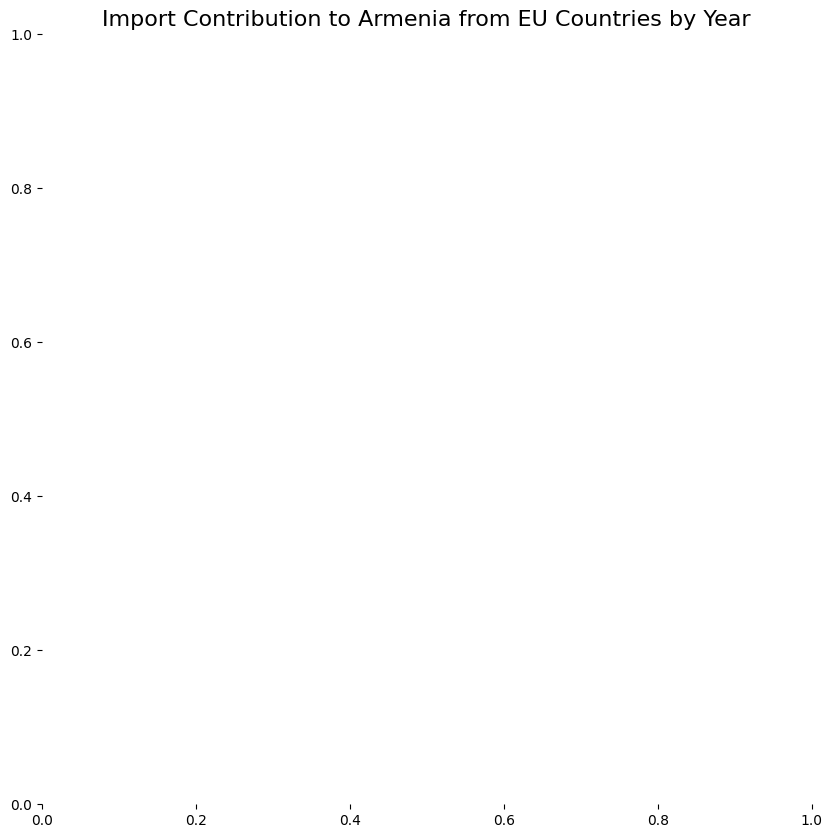

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import matplotlib.animation as animation
from IPython.display import HTML
import squarify

# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_IN_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Aggregate the data by 'REPORTER' and 'PERIOD' to calculate yearly imports from each country
yearly_imports = combined_df_filtered.groupby(['PERIOD', 'REPORTER'])['VALUE_IN_EUR'].sum().unstack(fill_value=0)

# Plotting an animated pie chart to show import contribution changes by year
fig, ax = plt.subplots(figsize=(10, 10))

# Function to initialize the pie chart
def init():
    ax.clear()
    ax.set_title('Import Contribution to Armenia from EU Countries by Year', fontsize=16)

# Function to update the pie chart for each year
def update(year):
    ax.clear()
    data = yearly_imports.loc[year]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    ax.set_title(f'Import Contribution to Armenia from EU Countries in {year}', fontsize=16)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=yearly_imports.index, init_func=init, repeat=False)

# Display the animation
HTML(ani.to_jshtml())


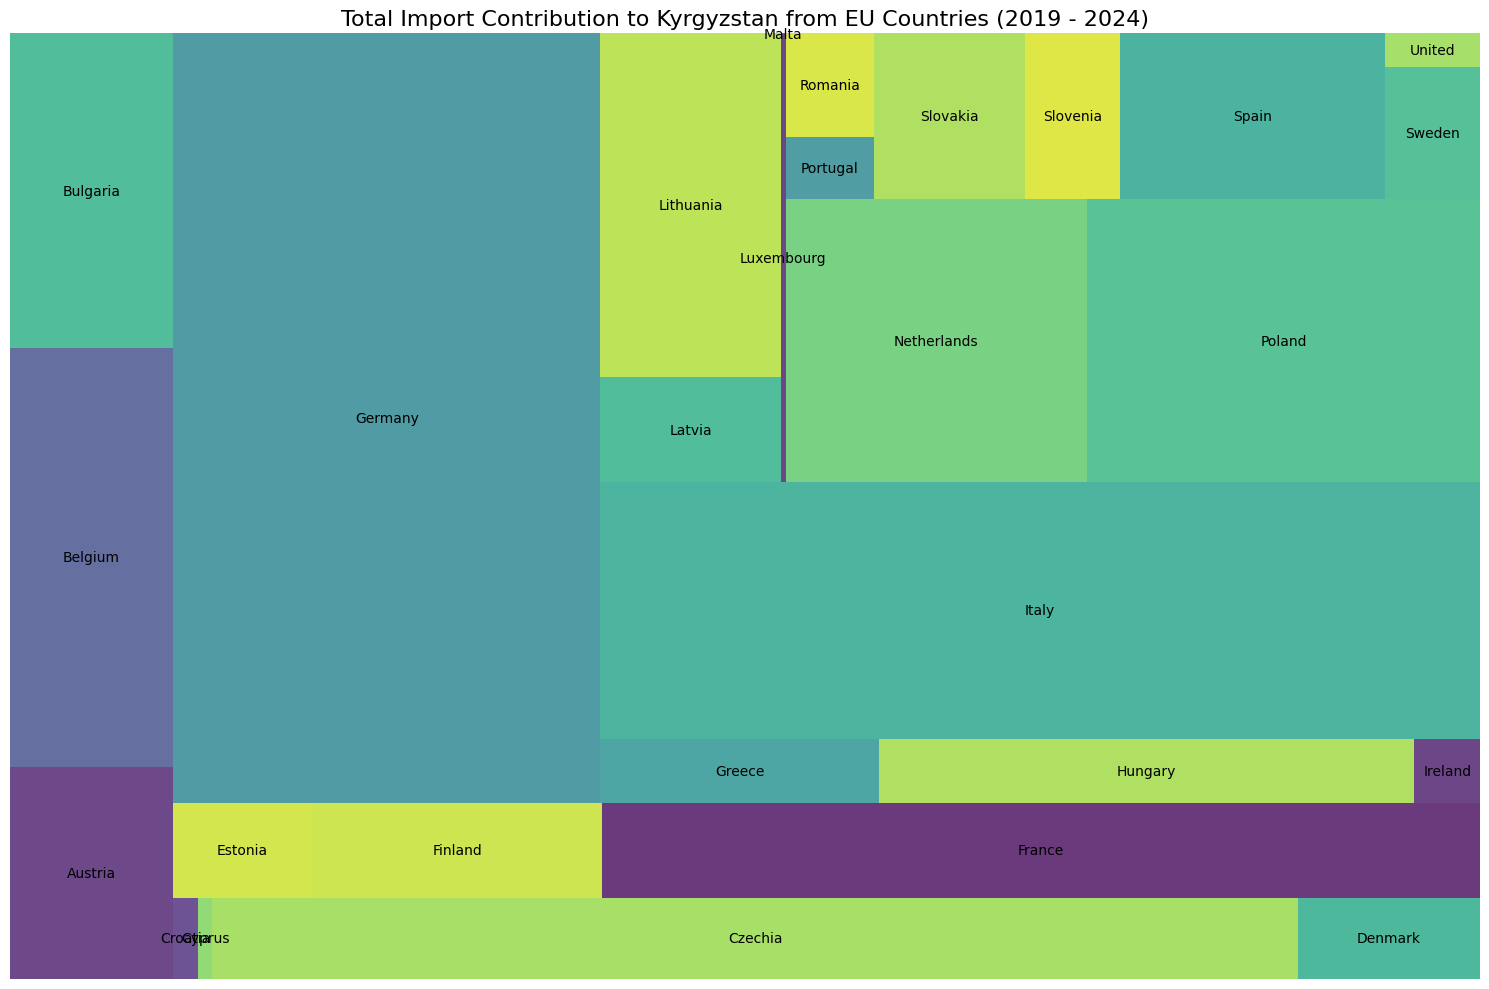

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML
import squarify

# Aggregate the data by 'REPORTER' to calculate total imports from each country
total_imports_by_country = combined_df_filtered.groupby('REPORTER')['VALUE_IN_EUR'].sum()

# Plotting the treemap to visualize total import contribution by each country
plt.figure(figsize=(15, 10))

# Using squarify to create the treemap
squarify.plot(sizes=total_imports_by_country.values, label=total_imports_by_country.index, alpha=0.8)

# Setting title
plt.title('Total Import Contribution to Kyrgyzstan from EU Countries (2019 - 2024)', fontsize=16)
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


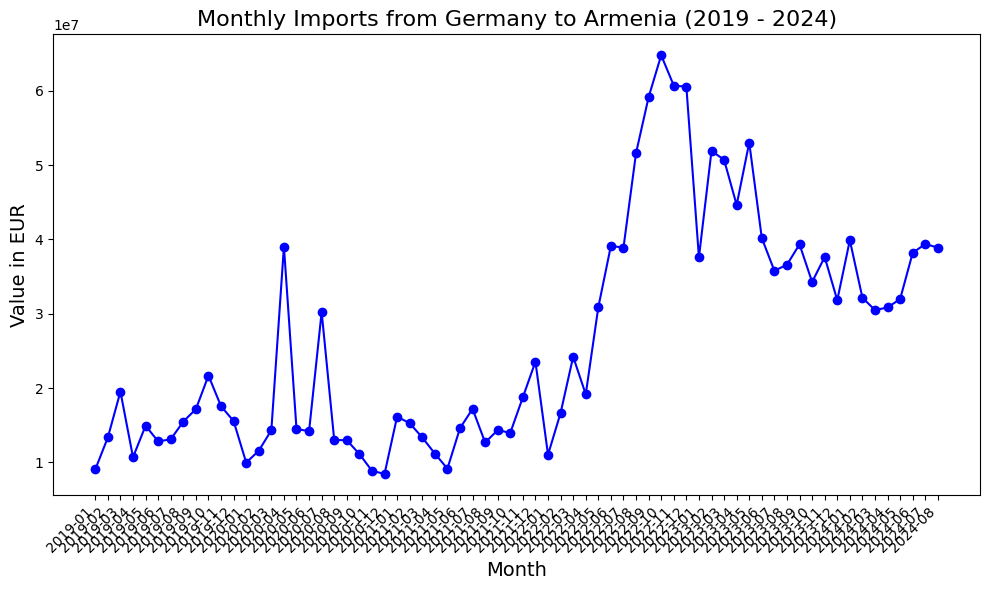

In [6]:
country = 'Germany'
# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_IN_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year and month
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y-%m')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Filter data for Germany
germany_imports = combined_df_filtered[combined_df_filtered['REPORTER'].str.contains(country)]

# Plotting a line chart to show changes in Germany's import to Kyrgyzstan by month
plt.figure(figsize=(10, 6))

plt.plot(germany_imports['PERIOD'], germany_imports['VALUE_IN_EUR'], marker='o', linestyle='-', color='b')

# Setting title and labels
plt.title(f'Monthly Imports from {country} to Armenia (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
germany_imports[:20]

,REPORTER,PERIOD,VALUE_IN_EUR
692,Germany,2019-01,1011388
1444,Germany,2019-02,1255407
594,Germany,2019-03,1853654
618,Germany,2019-04,1709551
1545,Germany,2019-05,1363846
1418,Germany,2019-06,815917
1596,Germany,2019-07,3005036
178,Germany,2019-08,1748249
1246,Germany,2019-09,548877
1396,Germany,2019-10,1116723


In [26]:
germany_imports[20:40]

,REPORTER,PERIOD,VALUE_IN_EUR
387,Germany,2020-09,2827236
227,Germany,2020-10,1493988
736,Germany,2020-11,2609780
896,Germany,2020-12,3116749
947,Germany,2021-01,1685879
1346,Germany,2021-02,2314055
921,Germany,2021-03,892841
1728,Germany,2021-04,2480535
1323,Germany,2021-05,578829
250,Germany,2021-06,2070017


In [27]:
germany_imports[40:]

,REPORTER,PERIOD,VALUE_IN_EUR
1019,Germany,2022-05,1784010
643,Germany,2022-06,1914791
1072,Germany,2022-07,1970016
815,Germany,2022-08,2745921
204,Germany,2022-09,1561766
465,Germany,2022-10,2489367
1298,Germany,2022-11,2817548
22,Germany,2022-12,2279298
1179,Germany,2023-01,1925869
542,Germany,2023-02,1286911
